In [1]:
packages <- c("ggplot2", "dplyr", "ggbreak", "lubridate", "grid", "fasttime", "pbkrtest", "ggpubr", "tidyr", "ggforce")
install.packages(packages)
lapply(packages, library, character.only = TRUE)

Installing packages into ‘/opt/homebrew/lib/R/4.2/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘grid’ is a base package, and should not be updated”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


ggbreak v0.1.1

If you use ggbreak in published research, please cite the following
paper:

S Xu, M Chen, T Feng, L Zhan, L Zhou, G Yu. Use ggbreak to effectively
utilize plotting space to deal with large datasets and outliers.
Frontiers in Genetics. 2021, 12:774846. doi: 10.3389/fgene.2021.774846



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘tidyr’


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack




[[1]]
[1] "ggplot2"   "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[2]]
[1] "dplyr"     "ggplot2"   "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     

[[3]]
 [1] "ggbreak"   "dplyr"     "ggplot2"   "stats"     "graphics"  "grDevices"
 [7] "utils"     "datasets"  "methods"   "base"     

[[4]]
 [1] "lubridate" "ggbreak"   "dplyr"     "ggplot2"   "stats"     "graphics" 
 [7] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[5]]
 [1] "grid"      "lubridate" "ggbreak"   "dplyr"     "ggplot2"   "stats"    
 [7] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[6]]
 [1] "fasttime"  "grid"      "lubridate" "ggbreak"   "dplyr"     "ggplot2"  
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[7]]
 [1] "pbkrtest"  "lme4"      "Matrix"    "fasttime"  "grid"      "lubridate"
 [7] "ggbreak"   "dplyr"     "ggplot2"   "stats"     "graphics"  "grDevices"
[13] "utils"     "datasets"  "methods"   "base"     

[[8]]
 [1] "ggpubr"    "pbkrtest"  "lme4"      "Matrix"    "fasttime"  "grid"     
 [7] "lubridate" "ggbreak"   "dplyr"     "ggplot2"   "stats"     "graphics" 
[13] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[9]]
 [1] "tidyr"     "ggpubr"    "pbkrtest"  "lme4"      "Matrix"    "fasttime" 
 [7] "grid"      "lubridate" "ggbreak"   "dplyr"     "ggplot2"   "stats"    
[13] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[10]]
 [1] "ggforce"   "tidyr"     "ggpubr"    "pbkrtest"  "lme4"      "Matrix"   
 [7] "fasttime"  "grid"      "lubridate" "ggbreak"   "dplyr"     "ggplot2"  
[13] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[19] "base"

In [2]:
df <- read.csv("data/processed/traces.csv", row.names=1) %>% mutate(timestamp = fastPOSIXct(timestamp))

### Panoptes inference duration

Warning message:
“The `fun.y` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun` argument instead.”
Warning message:
“Removed 915 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 915 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 915 rows containing non-finite values (`stat_summary()`).”


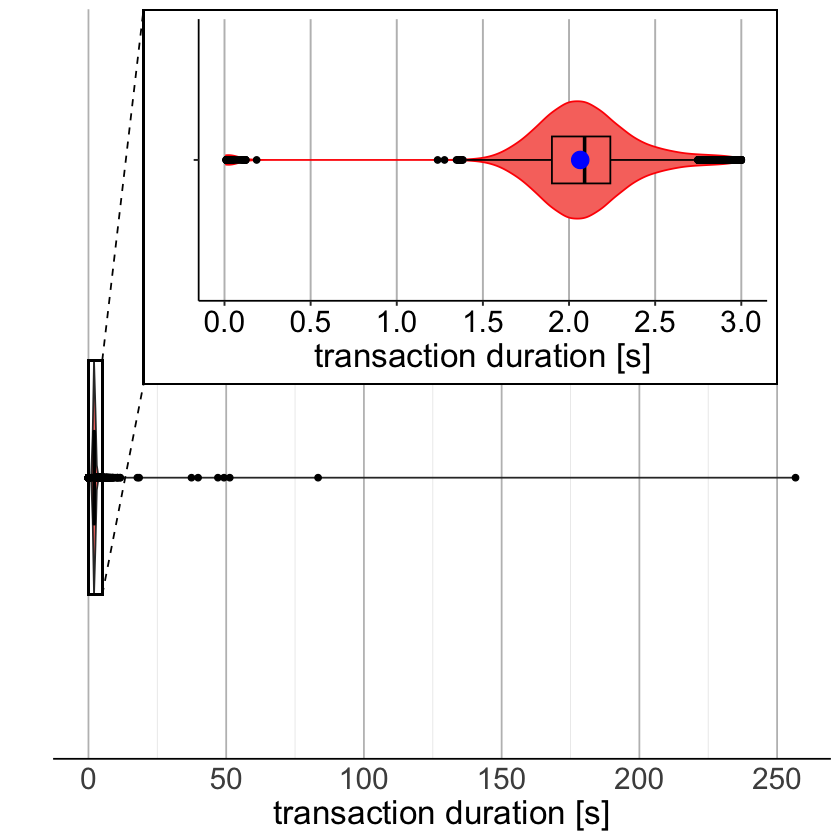

In [3]:
end_time <- fastPOSIXct("2023-04-13")
plotdf <- df %>%
    filter(service_name == "inference-ai-panoptes") %>% 
    filter(timestamp < end_time) %>%
    mutate(transaction_duration = transaction_duration / 1000 / 1000)

# calculate the number of data points in each figure
N <- plotdf %>% nrow()

p1a <- plotdf %>%
    ggplot(aes(x = transaction_duration, y="", fill="")) +
        geom_violin(width=0.5, color="red", adjust=2) +
        geom_boxplot(width=0.2, color="black") +
        stat_summary(fun.y=mean, geom="point", shape=20, size=7, color="blue", fill="red") +
        scale_x_continuous(breaks=pretty, limits=c(0,3)) +
        labs(x = "transaction duration [s]", y = "") +
        theme_pubr() +
        theme(
            axis.text = element_text(size = 18),
            axis.title = element_text(size = 20),
            axis.line.x = element_line(color="black"),
            panel.grid.major.y = element_blank(),
            panel.grid.major.x = element_line(color="grey"),
            plot.title = element_text(size = 20, hjust=0.5),
            legend.position = "none"
        )

p1b <- plotdf %>%
    ggplot(aes(x = transaction_duration, y="", fill="")) +
        geom_violin(width=0.5) +
        geom_boxplot(width=0.2, color="black") +
        labs(x = "transaction duration [s]", y = "") +
        scale_x_continuous(breaks=pretty) +
        theme_minimal() +
        theme(
            axis.text = element_text(size = 18),
            axis.title = element_text(size = 20),
            axis.line.x = element_line(color="black"),
            panel.grid.major.y = element_blank(),
            panel.grid.major.x = element_line(color="grey"),
            plot.title = element_text(size = 20, hjust=0.5),
            legend.position = "none"
        )

x1 <- 20
x2 <- 250
y1 <- 1.2
y2 <- 2

p1 <- p1b +
    annotation_custom(ggplotGrob(p1a), xmin = x1, xmax = x2, ymin = y1, ymax = y2) +
    geom_line(
        aes(x,y,group=grp), 
        data=data.frame(x = c(5, x1, 5, x1), y=c(0.75, y1, 1.25, y2),grp=c(1,1,2,2)),
        linetype='dashed'
    ) +
    geom_rect(aes(xmin = 0, xmax = 5, ymin = 0.75, ymax = 1.25), color="black", alpha=0) +
    geom_rect(aes(xmin = x1, xmax = x2, ymin = y1, ymax = y2), color='black', alpha=0)

p1

### Simonides inference duration

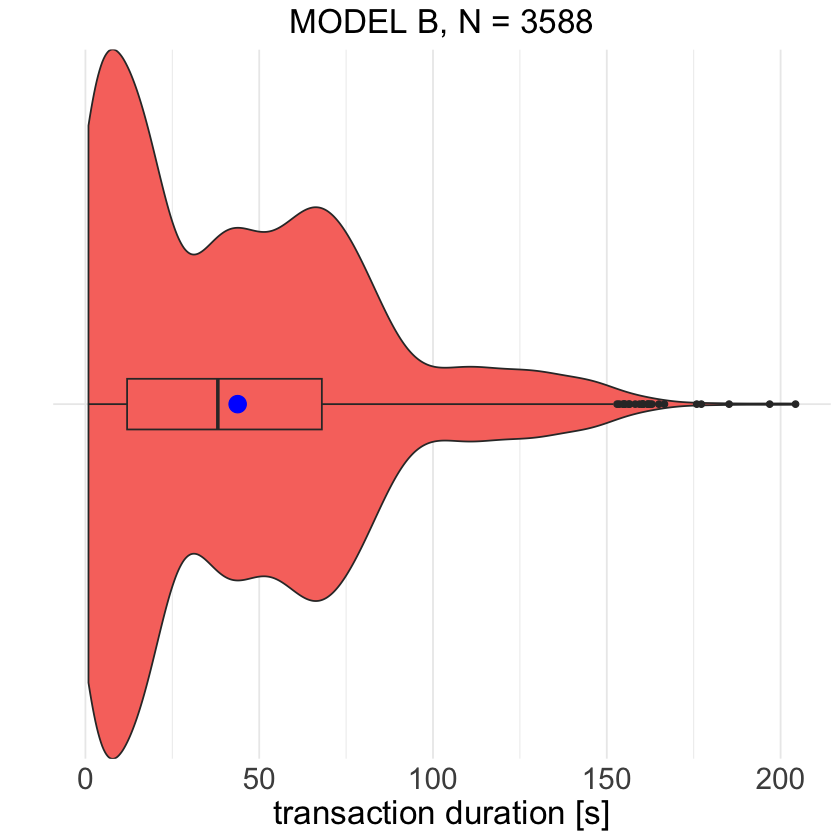

In [4]:
N <- df %>% filter(service_name == "inference-ai-simonides") %>% nrow()

p2 <- df %>%
    filter(service_name == "inference-ai-simonides") %>%
    mutate(transaction_duration = transaction_duration / 1000 / 1000) %>%
    ggplot(aes(x = transaction_duration, y="", fill="")) +
        geom_violin(width=1.4) +
        geom_boxplot(width=0.1) +
        stat_summary(fun.y=mean, geom="point", shape=20, size=7, color="blue", fill="blue") +
        labs(x = "transaction duration [s]", y="") +
        ggtitle(sprintf("MODEL B, N = %d", N)) +
        theme_minimal() +
        theme(
            axis.text = element_text(size = 18),
            axis.title = element_text(size=20),
            plot.title = element_text(size = 20, hjust=0.5),
            legend.position = "none"
        )

p2

### Mnemosyne inference duration

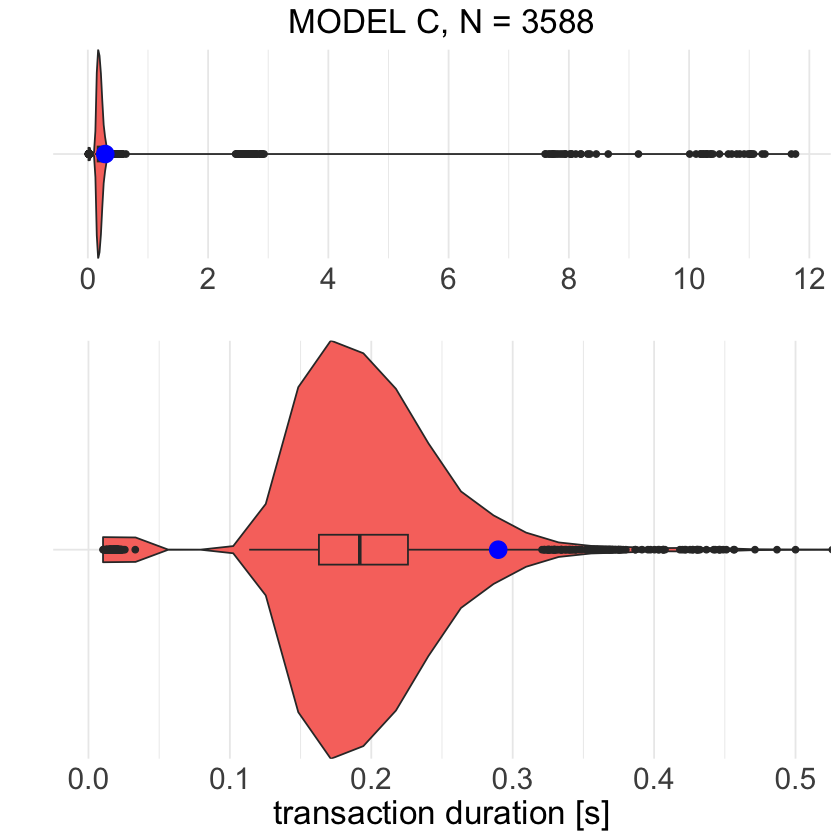

In [5]:
N <- df %>% filter(service_name == "inference-ai-simonides") %>% nrow()

p3 <- df %>%
    filter(service_name == "inference-ai-mnemosyne") %>%
    mutate(transaction_duration = transaction_duration / 1000 / 1000) %>%
    ggplot(aes(x = transaction_duration, y="", fill="")) +
        geom_violin(width=1.4) +
        geom_boxplot(width=0.1) +
        scale_x_continuous(breaks=pretty) +
        facet_zoom(xlim = c(0, 0.5)) +
        stat_summary(fun.y=mean, geom="point", shape=20, size=7, color="blue", fill="blue") +
        labs(x = "transaction duration [s]", y="") +
        ggtitle(sprintf("MODEL C, N = %d", N)) +
        theme_minimal() +
        theme(
            axis.text = element_text(size = 18),
            axis.title = element_text(size=20),
            plot.title = element_text(size = 20, hjust=0.5),
            legend.position = "none"
        )

p3

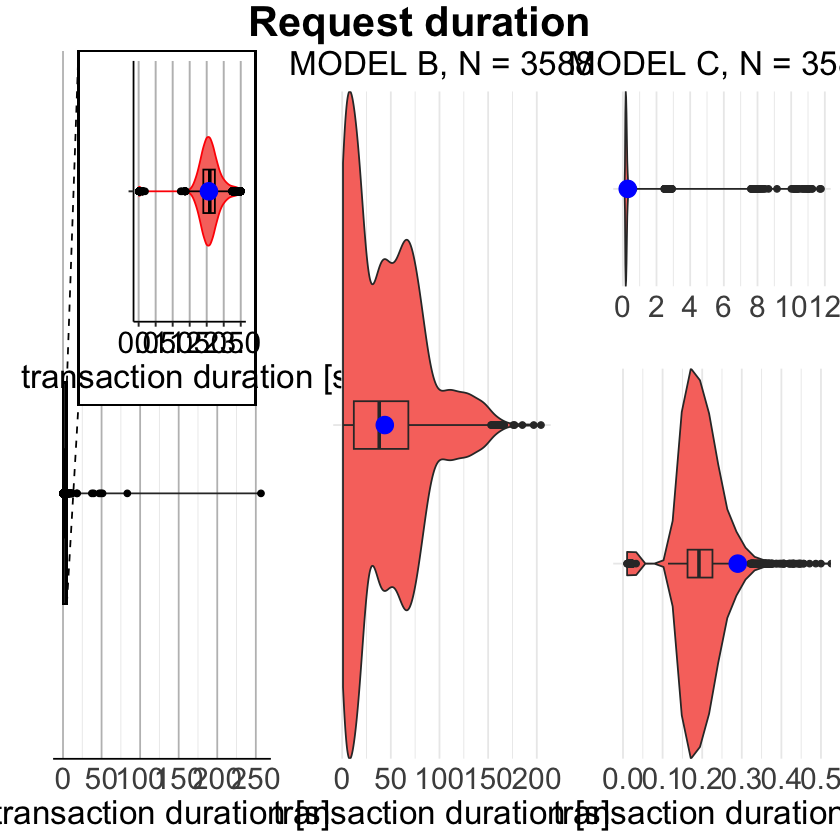

In [6]:
p <- ggarrange(p1, p2, p3, ncol=3, nrow=1) %>%
    annotate_figure(top = text_grob("Request duration", face = "bold", size = 25))

p
ggsave("output/request-duration-scale-1.pdf", width=16, height=6)

## Time of request arrival

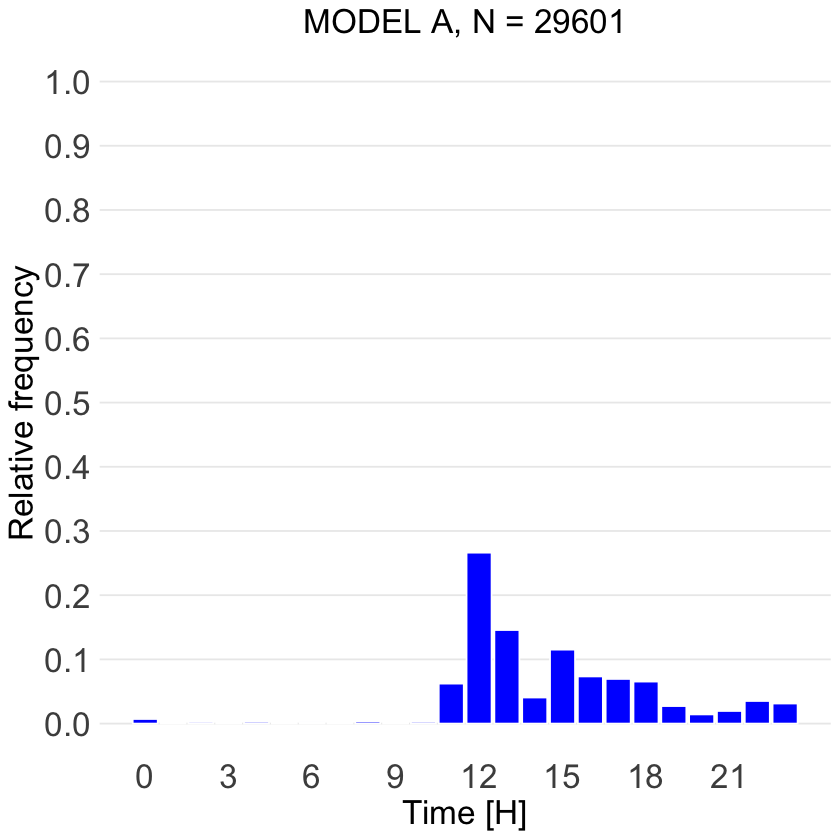

In [8]:
end_time <- fastPOSIXct("2023-04-13")
N <- df %>% filter(service_name == "inference-ai-panoptes") %>% filter(timestamp < end_time) %>% nrow()

p1 <- df %>%
    filter(service_name == "inference-ai-panoptes") %>%
    mutate(time_of_day = hour(ymd_hms(timestamp))) %>%
    group_by(time_of_day) %>%
    summarise(n = n()) %>%
    mutate(pct = n/sum(n)) %>%
    complete(time_of_day = 0:23, fill = list(n = 0, pct = 0)) %>%
    ggplot(aes(x = time_of_day, y = pct)) +
        geom_col(color = "white", fill = "blue") +
        labs(x = "Time [H]", y = "Relative frequency") +
        theme_minimal() +
        scale_y_continuous(limits=c(0, 1), breaks=seq(0, 1, by = 0.1)) +
        scale_x_continuous(breaks=seq(0, 23, by = 3)) +
        ggtitle(sprintf("MODEL A, N = %d", N)) +
        theme(
            axis.text = element_text(size = 20),
            axis.title = element_text(size = 20),
            panel.grid.major.x = element_blank(),
            panel.grid.minor = element_blank(),
            plot.title = element_text(size = 20, hjust=0.5)
        )

p1

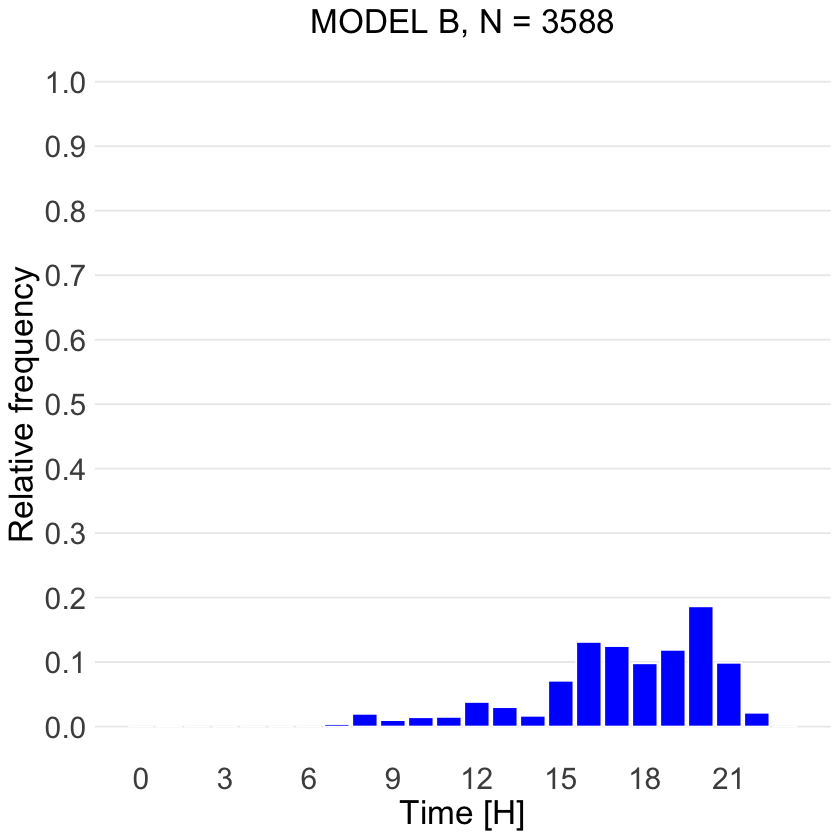

In [9]:
N <- df %>% filter(service_name == "inference-ai-simonides") %>% nrow()

p2 <- df %>%
    filter(service_name == "inference-ai-simonides") %>%
    mutate(time_of_day = hour(ymd_hms(timestamp))) %>%
    group_by(time_of_day) %>%
    summarise(n = n()) %>%
    mutate(pct = n/sum(n)) %>%
    complete(time_of_day = 0:23, fill = list(n = 0, pct = 0)) %>%
    ggplot(aes(x = time_of_day, y = pct)) +
        geom_col(color = "white", fill = "blue") +
        labs(x = "Time [H]", y = "Relative frequency") +
        theme_minimal() +
        scale_y_continuous(limits=c(0, 1), breaks=seq(0, 1, by = 0.1)) +
        scale_x_continuous(breaks=seq(0, 23, by = 3)) +
        ggtitle(sprintf("MODEL B, N = %d", N)) +
        theme(
            axis.text = element_text(size = 18),
            axis.title = element_text(size = 20),
            panel.grid.major.x = element_blank(),
            panel.grid.minor = element_blank(),
            plot.title = element_text(size = 20, hjust=0.5)
        )

p2

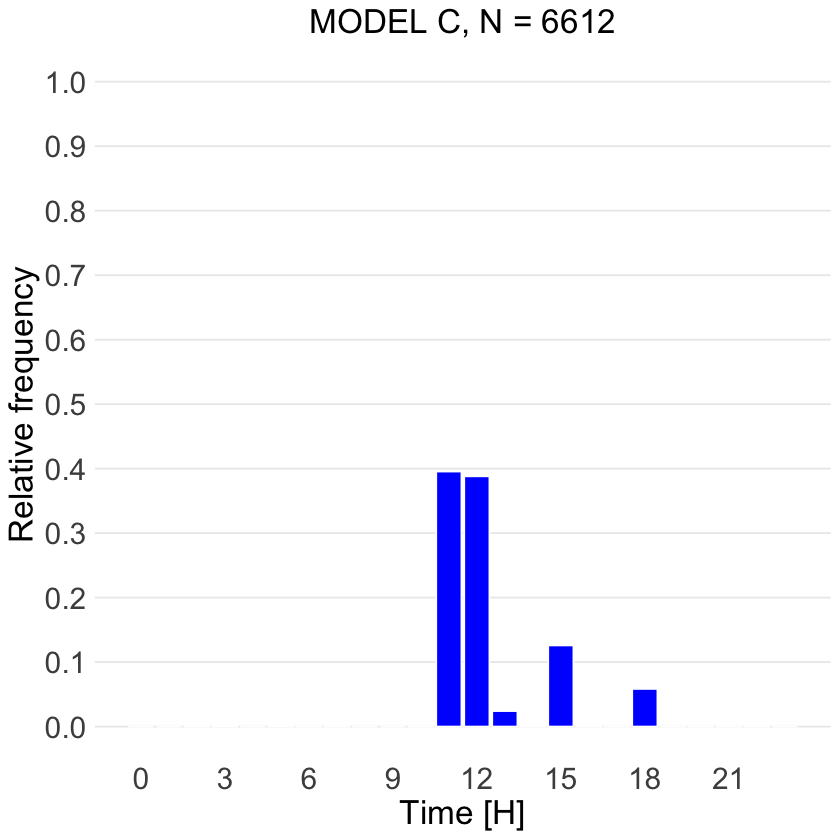

In [10]:
N <- df %>% filter(service_name == "inference-ai-mnemosyne") %>% nrow()

p3 <- df %>%
    filter(service_name == "inference-ai-mnemosyne") %>%
    mutate(time_of_day = hour(ymd_hms(timestamp))) %>%
    group_by(time_of_day) %>%
    summarise(n = n()) %>%
    mutate(pct = n/sum(n)) %>%
    complete(time_of_day = 0:23, fill = list(n = 0, pct = 0)) %>%
    ggplot(aes(x = time_of_day, y = pct)) +
        geom_col(color = "white", fill = "blue") +
        labs(x = "Time [H]", y = "Relative frequency") +
        theme_minimal() +
        scale_y_continuous(limits=c(0, 1), breaks=seq(0, 1, by = 0.1)) +
        scale_x_continuous(breaks=seq(0, 23, by = 3)) +
        ggtitle(sprintf("MODEL C, N = %d", N)) +
        theme(
            axis.text = element_text(size = 18),
            axis.title = element_text(size = 20),
            panel.grid.major.x = element_blank(),
            panel.grid.minor = element_blank(),
            plot.title = element_text(size = 20, hjust=0.5)
        )

p3

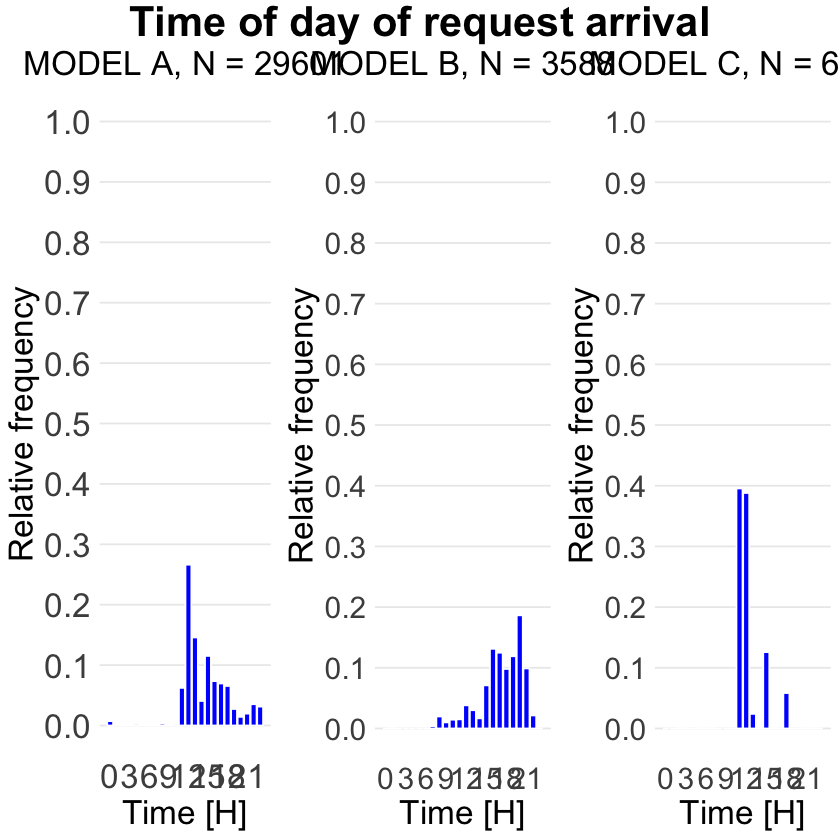

In [11]:
p <- ggarrange(p1, p2, p3, ncol=3, nrow=1) %>%
    annotate_figure(top = text_grob("Time of day of request arrival", face = "bold", size = 25))

p
ggsave("output/traces-hour-request-arrival.pdf", width=16, height=6)

## Weekday of request arrival

In [12]:
weekdays <- c("MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN")

### Panoptes weekday of request arrival

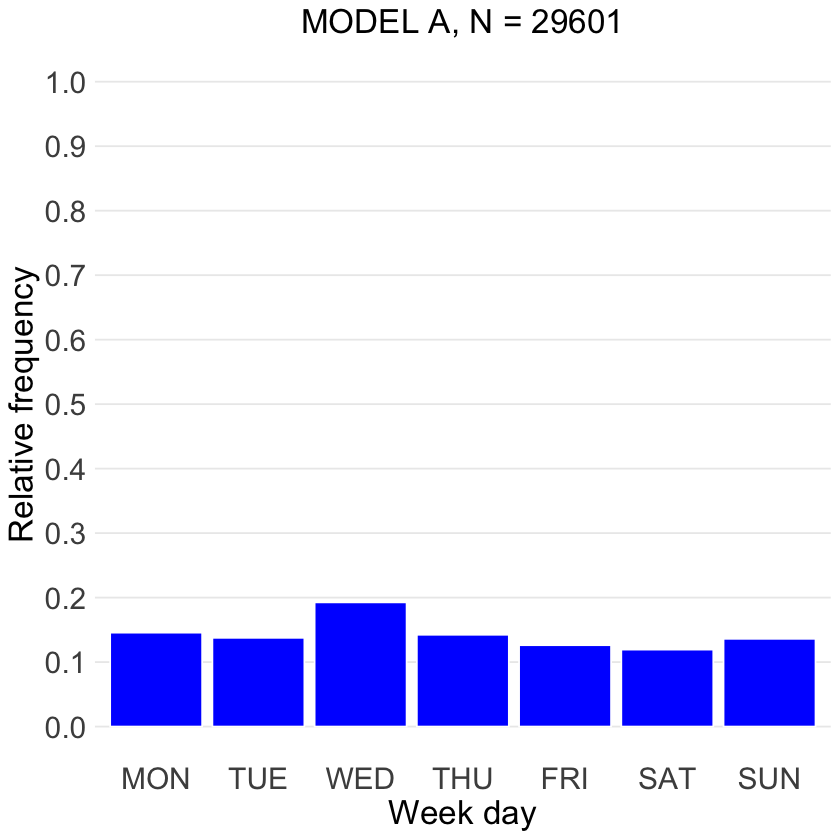

In [14]:
N <- df %>% filter(service_name == "inference-ai-panoptes") %>% filter(timestamp < end_time) %>% nrow()

p1 <- df %>%
    filter(service_name == "inference-ai-panoptes") %>%
    mutate(weekday = wday(ymd_hms(timestamp))) %>%
    mutate(weekday_name = factor(weekday, levels = 1:7, labels = weekdays)) %>%
    group_by(weekday_name) %>%
    summarise(n = n()) %>%
    mutate(pct = n/sum(n)) %>%
    complete(weekday_name = weekdays, fill = list(n = 0, pct = 0)) %>%
    ggplot(aes(x = weekday_name, y = pct)) +
        geom_col(color = "white", fill = "blue") +
        labs(x = "Week day", y = "Relative frequency") +
        theme_minimal() +
        scale_y_continuous(limits=c(0, 1), breaks=seq(0, 1, by = 0.1)) +
        scale_x_discrete(labels=weekdays) +
        ggtitle(sprintf("MODEL A, N = %d", N)) +
        theme(
            axis.text = element_text(size = 18),
            axis.title = element_text(size = 20),
            panel.grid.major.x = element_blank(),
            panel.grid.minor = element_blank(),
            plot.title = element_text(size = 20, hjust=0.5)
        )

p1
# ggsave("output/traces-panoptes-weekday-request-arrival.pdf", width=5, height=5)

### Simonides weekday request arrival

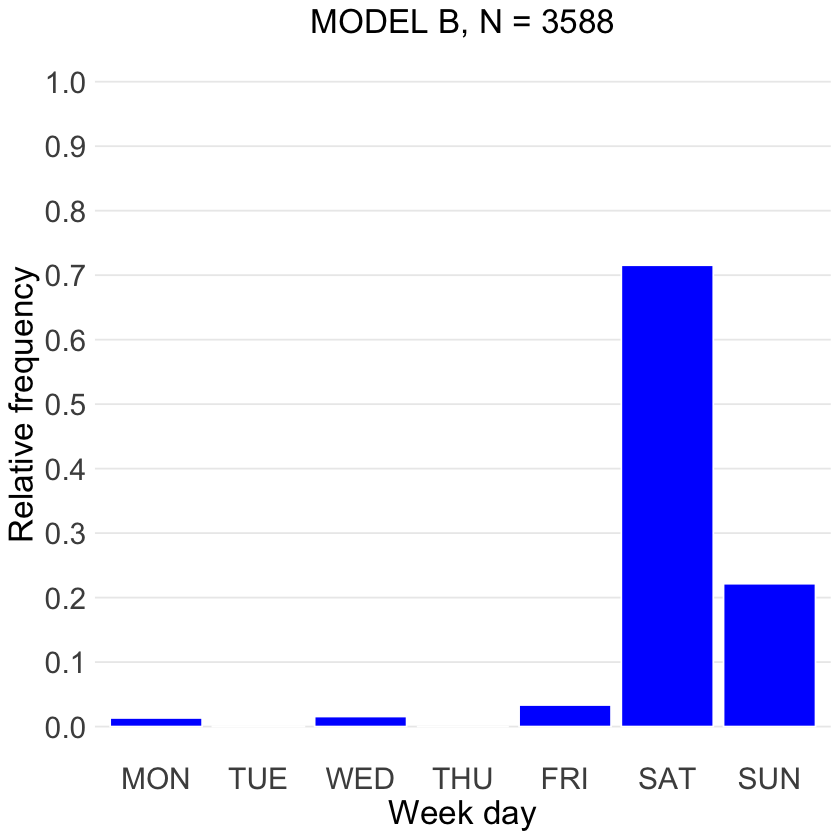

In [15]:
N <- df %>% filter(service_name == "inference-ai-simonides") %>% nrow()

p2 <- df %>%
    filter(service_name == "inference-ai-simonides") %>%
    mutate(weekday = wday(ymd_hms(timestamp))) %>%
    mutate(weekday_name = factor(weekday, levels = 1:7, labels = weekdays)) %>%
    group_by(weekday_name) %>%
    summarise(n = n()) %>%
    mutate(pct = n/sum(n)) %>%
    complete(weekday_name = weekdays, fill = list(n = 0, pct = 0)) %>%
    ggplot(aes(x = weekday_name, y = pct)) +
        geom_col(color = "white", fill = "blue") +
        labs(x = "Week day", y = "Relative frequency") +
        theme_minimal() +
        scale_y_continuous(limits=c(0, 1), breaks=seq(0, 1, by = 0.1)) +
        scale_x_discrete(labels=weekdays) +
        ggtitle(sprintf("MODEL B, N = %d", N)) +
        theme(
            axis.text = element_text(size = 18),
            axis.title = element_text(size = 20),
            panel.grid.major.x = element_blank(),
            panel.grid.minor = element_blank(),
            plot.title = element_text(size = 20, hjust=0.5)
        )

p2

### Mnemosyne weekday of request arrival

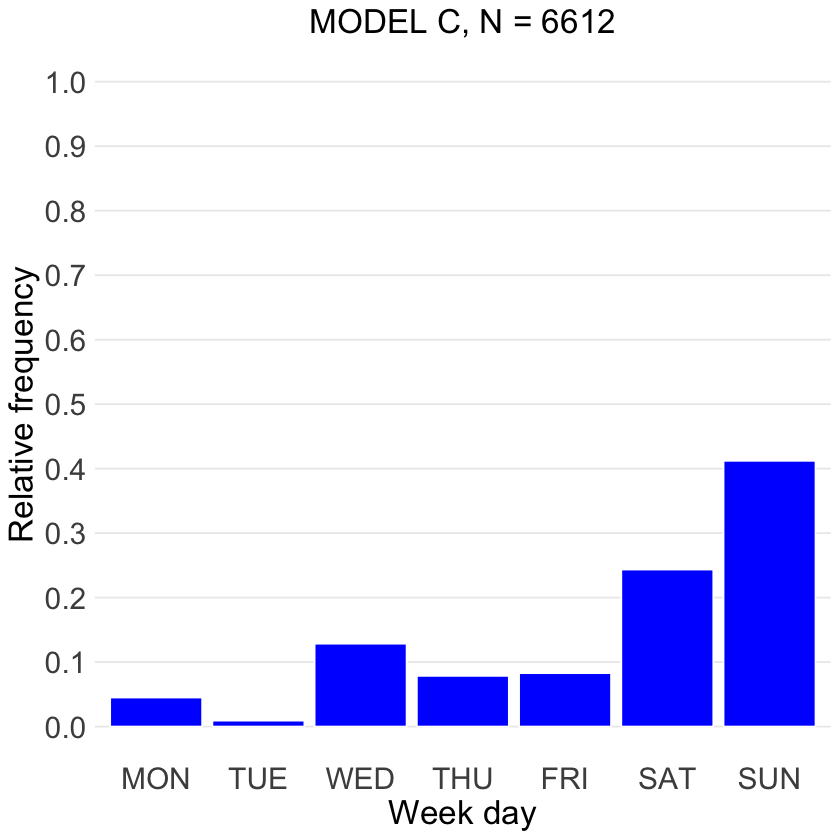

In [16]:
N <- df %>% filter(service_name == "inference-ai-mnemosyne") %>% nrow()

p3 <- df %>%
    filter(service_name == "inference-ai-mnemosyne") %>%
    mutate(weekday = wday(ymd_hms(timestamp))) %>%
    mutate(weekday_name = factor(weekday, levels = 1:7, labels = weekdays)) %>%
    group_by(weekday_name) %>%
    summarise(n = n()) %>%
    mutate(pct = n/sum(n)) %>%
    complete(weekday_name = weekdays, fill = list(n = 0, pct = 0)) %>%
    ggplot(aes(x = weekday_name, y = pct)) +
        geom_col(color = "white", fill = "blue") +
        labs(x = "Week day", y = "Relative frequency") +
        theme_minimal() +
        scale_y_continuous(limits=c(0, 1), breaks=seq(0, 1, by = 0.1)) +
        scale_x_discrete(labels=weekdays) +
        ggtitle(sprintf("MODEL C, N = %d", N)) +
        theme(
            axis.text = element_text(size = 18),
            axis.title = element_text(size = 20),
            panel.grid.major.x = element_blank(),
            panel.grid.minor = element_blank(),
            plot.title = element_text(size = 20, hjust=0.5)
        )

p3

### Combine

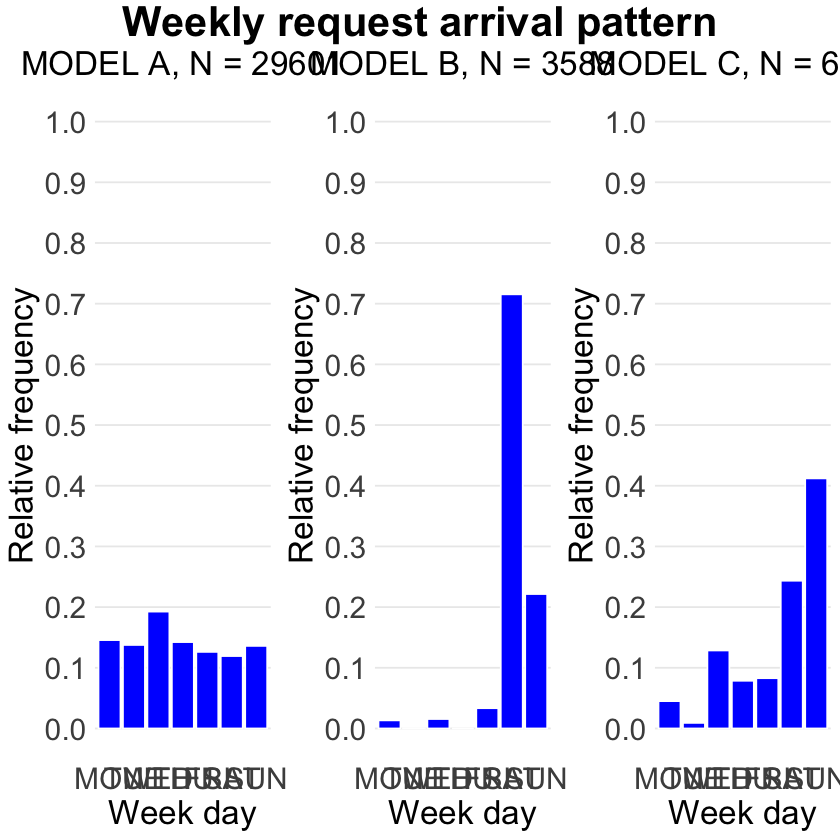

In [17]:
p <- ggarrange(p1, p2, p3, ncol=3, nrow=1) %>%
    annotate_figure(top = text_grob("Weekly request arrival pattern", face = "bold", size = 25))

p
ggsave("output/traces-weekday-request-arrival.pdf", width=16, height=6)